In [5]:
import pandas as pd 
from sklearn.decomposition import KernelPCA 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import numpy as np
import plotly.express as px
import nbformat
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import shap
from reg_resampler import resampler
from catboost import CatBoostRegressor

In [6]:
import plotly.graph_objects as go
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [7]:
data_c = pd.read_table("data/sequence_ogt_topt_features2_JF_19Jun22.tab")
data = pd.read_table("data/sequence_ogt_topt_features2_JF_19Jun22.tab")

In [8]:
temp = data["seq_TEMP"]
fig = px.box(data,y="seq_TEMP",points="all")
fig.show()

In [9]:
def temp_range_to_class(value):
    if value <= 20:
        return "very low"
    elif value <= 40 and value > 20:
        return "low"
    elif value <= 60 and value > 40:
        return "moderate"
    elif value <= 80 and value > 60:
        return "high"
    elif value <= 100 and value > 80:
        return "very high"
    
def temp_range_to_no(value):
    if value <= 20:
        return 0
    elif value <= 40 and value > 20:
        return 1
    elif value <= 60 and value > 40:
        return 2
    elif value <= 80 and value > 60:
        return 3
    elif value <= 100 and value > 80:
        return 4

In [10]:
data["range"] = data["seq_TEMP"].apply(temp_range_to_class)
data["range"] = data["seq_TEMP"].apply(temp_range_to_no)

In [11]:
data["range"].value_counts()

1    2129
3     306
2     255
4     193
0      34
Name: range, dtype: int64

In [40]:
data = data.drop(["seq_id","seq_OGT","length"], axis = 1)
input_d = data.drop(["range"], axis = 1)
output_d = data["range"]

X_model, X_validate, y_model, y_validate = train_test_split(input_d,output_d, test_size=0.3, random_state=42)

In [10]:
X, y = X_model, y_model
y = LabelEncoder().fit_transform(y)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [11]:
data_model = pd.DataFrame(X)
data_model["range"] = y

C:\Users\venka\AppData\Local\Temp\ipykernel_12108\3525701904.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [12]:
data_val = pd.DataFrame(X_validate)
data_val["range"] = y_validate

In [13]:
data_model

,seq_TEMP,A,C,D,E,F,G,H,I,K,...,g_distance_22,g_distance_23,g_distance_24,g_distance_25,g_distance_26,g_distance_27,g_distance_28,g_distance_29,g_distance_30,range
0,28,0.077617,0.010830,0.045126,0.077617,0.043321,0.115523,0.032491,0.046931,0.063177,...,0.033732,0.032725,0.033282,0.032768,0.029343,0.034372,0.035018,0.031848,0.031256,1
1,27,0.095687,0.006739,0.064690,0.030997,0.030997,0.115903,0.021563,0.044474,0.055256,...,0.034574,0.033355,0.032429,0.032889,0.032302,0.033342,0.032612,0.031925,0.032260,1
2,24,0.058628,0.016593,0.065265,0.063053,0.034292,0.078540,0.028761,0.059735,0.063053,...,0.032607,0.032940,0.034008,0.033486,0.033615,0.032509,0.031886,0.031534,0.032980,1
3,75,0.051724,0.000000,0.062069,0.051724,0.041379,0.055172,0.017241,0.086207,0.100000,...,0.030906,0.032037,0.034061,0.032789,0.028095,0.034551,0.032805,0.032935,0.031768,3
4,74,0.051447,0.001608,0.067524,0.061093,0.046624,0.053055,0.016077,0.094855,0.065916,...,0.033865,0.032924,0.033584,0.032396,0.032627,0.032281,0.032090,0.031904,0.031544,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7445,94,0.075148,0.002099,0.065410,0.086518,0.047924,0.077942,0.031074,0.059401,0.071011,...,0.031993,0.032788,0.031818,0.032480,0.031146,0.032610,0.032082,0.031864,0.031967,4
7446,96,0.108492,0.017204,0.057279,0.064961,0.025681,0.072245,0.012082,0.060312,0.051039,...,0.032407,0.032124,0.032060,0.030114,0.030230,0.031940,0.031050,0.030868,0.031340,4
7447,85,0.074790,0.006135,0.043263,0.101422,0.040674,0.080180,0.033051,0.076103,0.063017,...,0.033570,0.032669,0.031649,0.033011,0.030763,0.031009,0.032305,0.032644,0.031855,4
7448,92,0.079872,0.003495,0.061729,0.081754,0.047828,0.077084,0.029097,0.051323,0.069307,...,0.032282,0.032533,0.032505,0.032832,0.031517,0.032644,0.032240,0.032122,0.032047,4


In [14]:
data_val

,seq_TEMP,A,C,D,E,F,G,H,I,K,...,g_distance_22,g_distance_23,g_distance_24,g_distance_25,g_distance_26,g_distance_27,g_distance_28,g_distance_29,g_distance_30,range
2008,29,0.079498,0.016736,0.050209,0.064854,0.039749,0.064854,0.029289,0.089958,0.079498,...,0.030759,0.033229,0.031413,0.033347,0.031166,0.030719,0.032996,0.032691,0.032821,1
1041,25,0.081911,0.068259,0.051195,0.006826,0.044369,0.133106,0.006826,0.013652,0.037543,...,0.033445,0.031961,0.031912,0.032702,0.033158,0.031808,0.032780,0.033515,0.028646,1
2358,28,0.096618,0.019324,0.057971,0.077295,0.024155,0.067633,0.004831,0.038647,0.033816,...,0.030611,0.032501,0.030966,0.029603,0.032765,0.031070,0.031855,0.030868,0.030282,1
2164,74,0.057325,0.006369,0.076433,0.070064,0.050955,0.073248,0.025478,0.117834,0.085987,...,0.031691,0.029962,0.035020,0.035550,0.032767,0.031967,0.031492,0.029425,0.031455,3
1641,34,0.101493,0.007463,0.044776,0.061194,0.044776,0.092537,0.020896,0.044776,0.034328,...,0.031595,0.032873,0.033893,0.033254,0.030792,0.033082,0.032969,0.032031,0.032086,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,26,0.095969,0.023033,0.063340,0.038388,0.042226,0.094050,0.017274,0.044146,0.030710,...,0.032693,0.032799,0.031972,0.033903,0.032393,0.031894,0.030909,0.031157,0.031768,1
911,25,0.100000,0.010417,0.045833,0.056250,0.031250,0.077083,0.029167,0.045833,0.047917,...,0.032315,0.031662,0.032293,0.034042,0.031934,0.032483,0.032031,0.033216,0.032516,1
449,30,0.077320,0.001031,0.090722,0.047423,0.035052,0.077320,0.023711,0.052577,0.087629,...,0.033648,0.032821,0.033528,0.032909,0.033254,0.031640,0.031924,0.033573,0.032863,1
2035,81,0.078591,0.000000,0.062331,0.075881,0.024390,0.092141,0.021680,0.089431,0.073171,...,0.032553,0.034809,0.030635,0.032011,0.031766,0.032462,0.031816,0.031084,0.031252,4


In [15]:
data_model_f = data_model
data_xgb = data_model_f.drop(["seq_TEMP","range"], axis = 1)
data_xgb_y = data_model_f["range"] 

In [16]:
data_val_f = data_val.drop(["seq_TEMP","range"], axis = 1)
data_val_end = data_val["range"]

In [ ]:
model_c = CatBoostRegressor(
                        iterations=1000,
                        n_estimators=None,
                        learning_rate=0.1,
                        max_depth=8,
                        l2_leaf_reg=5,
                        loss_function='RMSE',
                        subsample=0.5,
                        colsample_bylevel=0.5,
                        objective= 'multi:softprob',
                        max_bin=256,
                        early_stopping_rounds=10,
                        )



In [22]:
model = model_c
X_train, X_test, y_train, y_test = train_test_split(data_xgb,data_xgb_y, test_size=0.3, random_state=42)

In [23]:
X_train = pd.DataFrame(X_train)
X_train.columns = data_xgb.columns

In [24]:
X_test = pd.DataFrame(X_test)
X_test.columns = data_xgb.columns

In [25]:
model.fit(X_train,y_train,eval_set=[(X_test, y_test),(data_val_f,data_val_end)],early_stopping_rounds=10)

[10:10:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=9
[10:10:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=7
[10:10:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=8
[10:10:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=10
[10:10:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-

Exception ignored on calling ctypes callback function: <function _log_callback at 0x000001CA15A26670>
Traceback (most recent call last):
  File "d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\core.py", line 160, in _log_callback
    def _log_callback(msg: bytes) -> None:
KeyboardInterrupt: 


[10:39:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=10
[10:39:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=10
[10:39:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=10
[10:39:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=10
[10:39:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c

In [21]:
eval_metrics = pd.DataFrame()
train_history = model.evals_result()
eval_metrics["AUC_Test"] = train_history["validation_0"]["auc"]
eval_metrics["AUC_Validation"] = train_history["validation_1"]["auc"]
eval_metrics["M-error_Test"] = train_history["validation_0"]["merror"]
eval_metrics["M-error_Validation"] = train_history["validation_1"]["merror"]

In [22]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=eval_metrics.index, y=eval_metrics["AUC_Test"],
                    mode='lines+markers',
                    name='Test AUC'))
fig.add_trace(go.Scatter(x=eval_metrics.index, y=eval_metrics["AUC_Validation"],
                    mode='lines+markers',
                    name='Validation AUC'))
fig.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

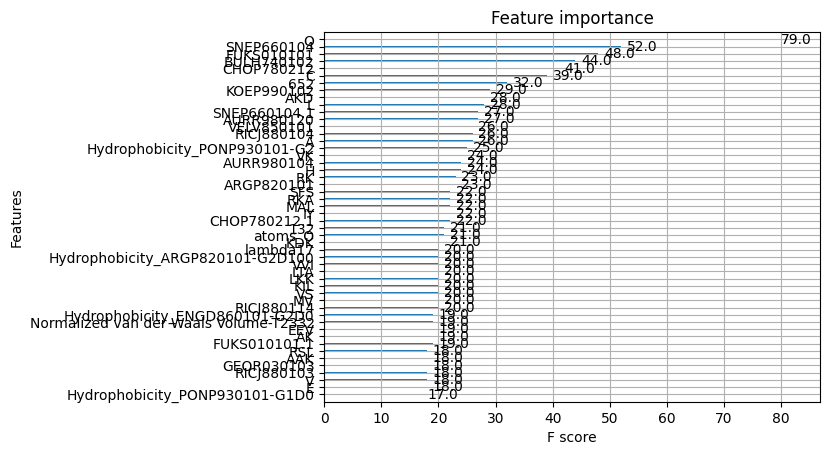

In [23]:
xgb.plot_importance(model, max_num_features = 50)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

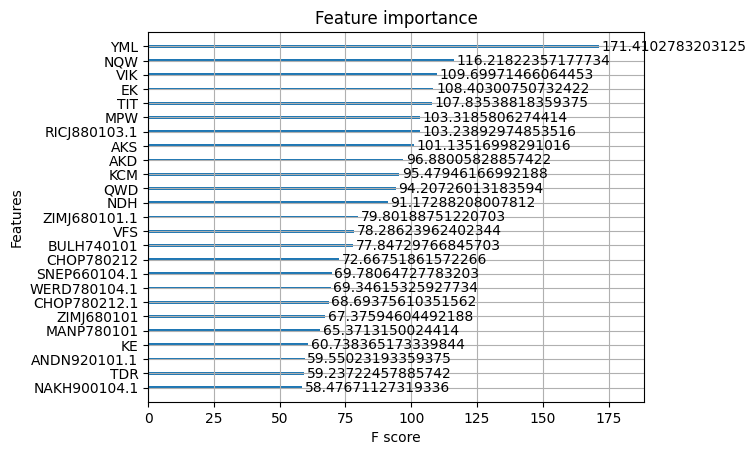

In [24]:
xgb.plot_importance(model, max_num_features = 25 ,importance_type = "gain")

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

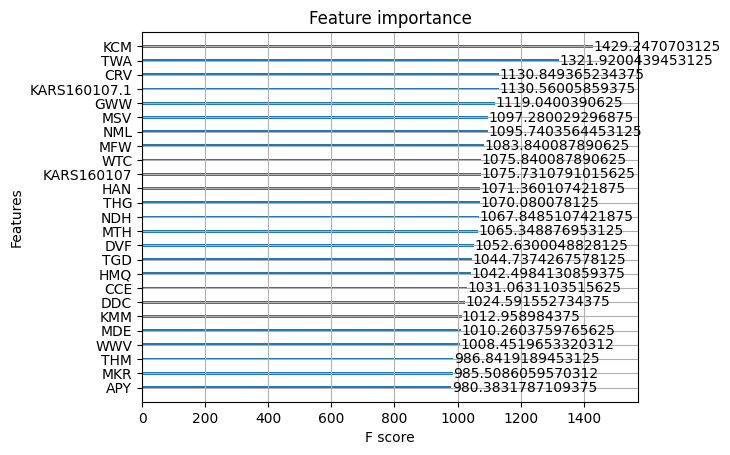

In [25]:
xgb.plot_importance(model, max_num_features = 25 ,importance_type = "cover")

In [26]:
X_model

,seq_TEMP,A,C,D,E,F,G,H,I,K,...,g_distance_21,g_distance_22,g_distance_23,g_distance_24,g_distance_25,g_distance_26,g_distance_27,g_distance_28,g_distance_29,g_distance_30
1071,28,0.077617,0.010830,0.045126,0.077617,0.043321,0.115523,0.032491,0.046931,0.063177,...,0.032391,0.033732,0.032725,0.033282,0.032768,0.029343,0.034372,0.035018,0.031848,0.031256
84,27,0.095687,0.006739,0.064690,0.030997,0.030997,0.115903,0.021563,0.044474,0.055256,...,0.032340,0.034574,0.033355,0.032429,0.032889,0.032302,0.033342,0.032612,0.031925,0.032260
2399,24,0.058628,0.016593,0.065265,0.063053,0.034292,0.078540,0.028761,0.059735,0.063053,...,0.033750,0.032607,0.032940,0.034008,0.033486,0.033615,0.032509,0.031886,0.031534,0.032980
776,75,0.051724,0.000000,0.062069,0.051724,0.041379,0.055172,0.017241,0.086207,0.100000,...,0.033604,0.030906,0.032037,0.034061,0.032789,0.028095,0.034551,0.032805,0.032935,0.031768
841,74,0.051447,0.001608,0.067524,0.061093,0.046624,0.053055,0.016077,0.094855,0.065916,...,0.032724,0.033865,0.032924,0.033584,0.032396,0.032627,0.032281,0.032090,0.031904,0.031544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,37,0.080000,0.003333,0.063333,0.073333,0.043333,0.093333,0.026667,0.056667,0.016667,...,0.033818,0.033949,0.032193,0.033575,0.031405,0.030472,0.032492,0.033356,0.029858,0.031813
1095,74,0.033143,0.000000,0.027429,0.028571,0.042286,0.078857,0.001143,0.113143,0.043429,...,0.033466,0.034965,0.033697,0.033711,0.033950,0.032517,0.032049,0.031396,0.032343,0.029499
1130,43,0.129964,0.007220,0.075812,0.079422,0.018051,0.057762,0.010830,0.068592,0.093863,...,0.031981,0.030214,0.033720,0.032594,0.030577,0.029993,0.031100,0.031224,0.030679,0.030653
1294,28,0.098667,0.010667,0.064000,0.026667,0.026667,0.098667,0.016000,0.069333,0.064000,...,0.035174,0.032975,0.032266,0.032514,0.033899,0.029614,0.031239,0.030623,0.032460,0.030986


In [27]:
y_model

1071    1
84      1
2399    1
776     3
841     3
       ..
1638    1
1095    3
1130    2
1294    1
860     1
Name: range, Length: 2041, dtype: int64

In [28]:
y_test = y_test.reset_index()
y_test

,index,range
0,1287,1
1,6061,3
2,1978,0
3,3269,0
4,1038,1
...,...,...
2230,4342,2
2231,2840,0
2232,5876,3
2233,7211,4


In [29]:
X_test_R = X_validate.drop(["seq_TEMP","range"],axis = 1 )
X_test_R = X_test_R.reset_index()

In [30]:
X_test_R = X_test_R.drop(columns=["index"], axis = 1)

In [31]:
test_proba = model.predict_proba(X_test_R)
test_proba = pd.DataFrame(test_proba,columns=["vlow","low","med","hi","vhi"])
test_proba

,vlow,low,med,hi,vhi
0,0.011229,0.941282,0.026683,0.011727,0.009078
1,0.003439,0.981333,0.008256,0.003221,0.003751
2,0.009965,0.917704,0.037877,0.019677,0.014777
3,0.022684,0.072595,0.059808,0.777713,0.067199
4,0.006270,0.954287,0.024829,0.009040,0.005574
...,...,...,...,...,...
871,0.005602,0.953540,0.030123,0.005837,0.004898
872,0.006293,0.925898,0.041854,0.022167,0.003789
873,0.014681,0.939826,0.026134,0.008441,0.010917
874,0.010385,0.017816,0.038355,0.119963,0.813481


In [32]:
X_test_R["range"]     =  model.predict(X_test_R)
X_test_R["prob_vlow"] =  test_proba["vlow"]
X_test_R["prob_low"]  =  test_proba["low"]
X_test_R["prob_med"]  =  test_proba["med"]
X_test_R["prob_hig"]  =  test_proba["hi"]
X_test_R["prob_vhig"] =  test_proba["vhi"]
Y_test_R              =  X_validate["seq_TEMP"]

In [33]:
Y_test_R = Y_test_R.reset_index()
Y_test_R = Y_test_R.drop(columns=["index"], axis = 1)
Y_test_R = Y_test_R["seq_TEMP"]
Y_test_R = pd.DataFrame(Y_test_R, columns=["seq_TEMP"])
Y_test_R

,seq_TEMP
0,29
1,25
2,28
3,74
4,34
...,...
871,26
872,25
873,30
874,81


In [34]:
X_test_R

,A,C,D,E,F,G,H,I,K,L,...,g_distance_27,g_distance_28,g_distance_29,g_distance_30,range,prob_vlow,prob_low,prob_med,prob_hig,prob_vhig
0,0.079498,0.016736,0.050209,0.064854,0.039749,0.064854,0.029289,0.089958,0.079498,0.073222,...,0.030719,0.032996,0.032691,0.032821,1,0.011229,0.941282,0.026683,0.011727,0.009078
1,0.081911,0.068259,0.051195,0.006826,0.044369,0.133106,0.006826,0.013652,0.037543,0.047782,...,0.031808,0.032780,0.033515,0.028646,1,0.003439,0.981333,0.008256,0.003221,0.003751
2,0.096618,0.019324,0.057971,0.077295,0.024155,0.067633,0.004831,0.038647,0.033816,0.077295,...,0.031070,0.031855,0.030868,0.030282,1,0.009965,0.917704,0.037877,0.019677,0.014777
3,0.057325,0.006369,0.076433,0.070064,0.050955,0.073248,0.025478,0.117834,0.085987,0.073248,...,0.031967,0.031492,0.029425,0.031455,3,0.022684,0.072595,0.059808,0.777713,0.067199
4,0.101493,0.007463,0.044776,0.061194,0.044776,0.092537,0.020896,0.044776,0.034328,0.083582,...,0.033082,0.032969,0.032031,0.032086,1,0.006270,0.954287,0.024829,0.009040,0.005574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0.095969,0.023033,0.063340,0.038388,0.042226,0.094050,0.017274,0.044146,0.030710,0.069098,...,0.031894,0.030909,0.031157,0.031768,1,0.005602,0.953540,0.030123,0.005837,0.004898
872,0.100000,0.010417,0.045833,0.056250,0.031250,0.077083,0.029167,0.045833,0.047917,0.108333,...,0.032483,0.032031,0.033216,0.032516,1,0.006293,0.925898,0.041854,0.022167,0.003789
873,0.077320,0.001031,0.090722,0.047423,0.035052,0.077320,0.023711,0.052577,0.087629,0.064948,...,0.031640,0.031924,0.033573,0.032863,1,0.014681,0.939826,0.026134,0.008441,0.010917
874,0.078591,0.000000,0.062331,0.075881,0.024390,0.092141,0.021680,0.089431,0.073171,0.084011,...,0.032462,0.031816,0.031084,0.031252,4,0.010385,0.017816,0.038355,0.119963,0.813481


In [35]:
X_train_R = X_model.drop(["seq_TEMP"], axis = 1)
train_proba = model.predict_proba(X_train_R)
train_proba = pd.DataFrame(train_proba,columns=["vlow","low","med","hi","vhi"])
X_train_R["range"] = model.predict(X_train_R)
X_train_R = X_train_R.reset_index()
X_train_R = X_train_R.drop(columns=["index"], axis = 1)
X_train_R["prob_vlow"] =  train_proba["vlow"]
X_train_R["prob_low"]  =  train_proba["low"]
X_train_R["prob_med"]  =  train_proba["med"]
X_train_R["prob_hig"]  =  train_proba["hi"]
X_train_R["prob_vhig"] =  train_proba["vhi"]

In [36]:
X_train_R

,A,C,D,E,F,G,H,I,K,L,...,g_distance_27,g_distance_28,g_distance_29,g_distance_30,range,prob_vlow,prob_low,prob_med,prob_hig,prob_vhig
0,0.077617,0.010830,0.045126,0.077617,0.043321,0.115523,0.032491,0.046931,0.063177,0.084838,...,0.034372,0.035018,0.031848,0.031256,2,0.066844,0.250351,0.359808,0.160183,0.162814
1,0.095687,0.006739,0.064690,0.030997,0.030997,0.115903,0.021563,0.044474,0.055256,0.071429,...,0.033342,0.032612,0.031925,0.032260,1,0.006331,0.967714,0.016035,0.005495,0.004426
2,0.058628,0.016593,0.065265,0.063053,0.034292,0.078540,0.028761,0.059735,0.063053,0.075221,...,0.032509,0.031886,0.031534,0.032980,1,0.003847,0.970743,0.015316,0.005384,0.004710
3,0.051724,0.000000,0.062069,0.051724,0.041379,0.055172,0.017241,0.086207,0.100000,0.120690,...,0.034551,0.032805,0.032935,0.031768,3,0.003213,0.017393,0.006076,0.969524,0.003794
4,0.051447,0.001608,0.067524,0.061093,0.046624,0.053055,0.016077,0.094855,0.065916,0.090032,...,0.032281,0.032090,0.031904,0.031544,3,0.002629,0.009127,0.005186,0.980519,0.002540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,0.080000,0.003333,0.063333,0.073333,0.043333,0.093333,0.026667,0.056667,0.016667,0.080000,...,0.032492,0.033356,0.029858,0.031813,1,0.010502,0.884156,0.058037,0.029249,0.018056
2037,0.033143,0.000000,0.027429,0.028571,0.042286,0.078857,0.001143,0.113143,0.043429,0.094857,...,0.032049,0.031396,0.032343,0.029499,3,0.004847,0.010148,0.006630,0.975227,0.003148
2038,0.129964,0.007220,0.075812,0.079422,0.018051,0.057762,0.010830,0.068592,0.093863,0.090253,...,0.031100,0.031224,0.030679,0.030653,2,0.004341,0.006707,0.927332,0.007580,0.054039
2039,0.098667,0.010667,0.064000,0.026667,0.026667,0.098667,0.016000,0.069333,0.064000,0.056000,...,0.031239,0.030623,0.032460,0.030986,1,0.002681,0.982114,0.009373,0.002760,0.003072


In [37]:
y_train_R = X_model["seq_TEMP"]


In [38]:
Y_train_R = y_train_R.reset_index()
Y_train_R = Y_train_R.drop(columns=["index"], axis = 1)
Y_train_R

,seq_TEMP
0,28
1,27
2,24
3,75
4,74
...,...
2036,37
2037,74
2038,43
2039,28


In [39]:
rs = resampler()
X_train_R["target"] = Y_train_R
Y_classes = rs.fit(X_train_R, target="target", bins= 5)
Y =  Y_train_R
smote = SMOTE(random_state=27)
final_X, final_Y = rs.resample(smote, X_train_R, Y_classes)
X_train_R = X_train_R.drop(columns=["target"], axis = 1)


Class Distribution:
-------------------
0: 49
1: 1477
2: 154
3: 219
4: 142



In [40]:
final_X

,A,C,D,E,F,G,H,I,K,L,...,g_distance_27,g_distance_28,g_distance_29,g_distance_30,range,prob_vlow,prob_low,prob_med,prob_hig,prob_vhig
0,0.077617,0.010830,0.045126,0.077617,0.043321,0.115523,0.032491,0.046931,0.063177,0.084838,...,0.034372,0.035018,0.031848,0.031256,2,0.066844,0.250351,0.359808,0.160183,0.162814
1,0.095687,0.006739,0.064690,0.030997,0.030997,0.115903,0.021563,0.044474,0.055256,0.071429,...,0.033342,0.032612,0.031925,0.032260,1,0.006331,0.967714,0.016035,0.005495,0.004426
2,0.058628,0.016593,0.065265,0.063053,0.034292,0.078540,0.028761,0.059735,0.063053,0.075221,...,0.032509,0.031886,0.031534,0.032980,1,0.003847,0.970743,0.015316,0.005384,0.004710
3,0.051724,0.000000,0.062069,0.051724,0.041379,0.055172,0.017241,0.086207,0.100000,0.120690,...,0.034551,0.032805,0.032935,0.031768,3,0.003213,0.017393,0.006076,0.969524,0.003794
4,0.051447,0.001608,0.067524,0.061093,0.046624,0.053055,0.016077,0.094855,0.065916,0.090032,...,0.032281,0.032090,0.031904,0.031544,3,0.002629,0.009127,0.005186,0.980519,0.002540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,0.083031,0.003894,0.055012,0.107421,0.042810,0.083031,0.014270,0.071607,0.053963,0.081998,...,0.032481,0.033396,0.032380,0.030771,4,0.003122,0.004868,0.005047,0.007134,0.979829
7381,0.080631,0.001472,0.049317,0.096725,0.026396,0.106244,0.024142,0.070078,0.063064,0.076840,...,0.032898,0.030708,0.032012,0.031063,4,0.003040,0.005437,0.006557,0.005109,0.979858
7382,0.089621,0.002891,0.067645,0.079209,0.028910,0.087903,0.023997,0.087599,0.069101,0.062450,...,0.031601,0.031095,0.031557,0.031700,4,0.002899,0.005538,0.012883,0.006619,0.972060
7383,0.053434,0.007082,0.050346,0.104519,0.041751,0.071899,0.018615,0.074078,0.094955,0.084255,...,0.033101,0.033334,0.032852,0.032361,4,0.003909,0.004872,0.014778,0.037573,0.938868


In [41]:
final_X["range"].value_counts()

1    2082
3    1462
4    1462
2    1388
0     991
Name: range, dtype: int64

In [50]:
model = xgb.XGBRegressor(
                         num_parallel_tree = 1,
                         max_depth = 20,
                         n_estimators=300,
                         learning_rate = 0.1,
                         verbosity = 2,
                         booster = 'gbtree',
                         n_jobs = -1,
                         sampling_method ='uniform',
                         subsample = 0.5,
                         colsample_bytree = 0.5,
                         objective ='reg:squarederror',
                         gamma = 2,
                         reg_alpha = 0.5,
                         reg_lambda =5,
                         eval_metric = ["rmse"]
                        )

[11:15:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=12
[0]	validation_0-rmse:40.26151	validation_1-rmse:53.93617
[11:15:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=15
[1]	validation_0-rmse:36.58575	validation_1-rmse:49.02972
[11:15:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=12
[2]	validation_0-rmse:33.43560	validation_1-rmse:44.46287
[11:15:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_pr

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=['rmse'], feature_types=None, gamma=2, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=20, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
model.fit(fulldata_ind_concat,fulldata_dep_concat,eval_set=[(X_test_R,Y_test_R),(final_X,final_Y)])

In [42]:
fulldata_ind_concat = pd.concat([X_train_R,X_test_R],ignore_index=True)
fulldata_dep_concat = pd.concat([Y_train_R,Y_test_R],ignore_index=True)


In [43]:
fulldata_ind_concat

,A,C,D,E,F,G,H,I,K,L,...,g_distance_27,g_distance_28,g_distance_29,g_distance_30,range,prob_vlow,prob_low,prob_med,prob_hig,prob_vhig
0,0.077617,0.010830,0.045126,0.077617,0.043321,0.115523,0.032491,0.046931,0.063177,0.084838,...,0.034372,0.035018,0.031848,0.031256,2,0.066844,0.250351,0.359808,0.160183,0.162814
1,0.095687,0.006739,0.064690,0.030997,0.030997,0.115903,0.021563,0.044474,0.055256,0.071429,...,0.033342,0.032612,0.031925,0.032260,1,0.006331,0.967714,0.016035,0.005495,0.004426
2,0.058628,0.016593,0.065265,0.063053,0.034292,0.078540,0.028761,0.059735,0.063053,0.075221,...,0.032509,0.031886,0.031534,0.032980,1,0.003847,0.970743,0.015316,0.005384,0.004710
3,0.051724,0.000000,0.062069,0.051724,0.041379,0.055172,0.017241,0.086207,0.100000,0.120690,...,0.034551,0.032805,0.032935,0.031768,3,0.003213,0.017393,0.006076,0.969524,0.003794
4,0.051447,0.001608,0.067524,0.061093,0.046624,0.053055,0.016077,0.094855,0.065916,0.090032,...,0.032281,0.032090,0.031904,0.031544,3,0.002629,0.009127,0.005186,0.980519,0.002540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,0.095969,0.023033,0.063340,0.038388,0.042226,0.094050,0.017274,0.044146,0.030710,0.069098,...,0.031894,0.030909,0.031157,0.031768,1,0.005602,0.953540,0.030123,0.005837,0.004898
2913,0.100000,0.010417,0.045833,0.056250,0.031250,0.077083,0.029167,0.045833,0.047917,0.108333,...,0.032483,0.032031,0.033216,0.032516,1,0.006293,0.925898,0.041854,0.022167,0.003789
2914,0.077320,0.001031,0.090722,0.047423,0.035052,0.077320,0.023711,0.052577,0.087629,0.064948,...,0.031640,0.031924,0.033573,0.032863,1,0.014681,0.939826,0.026134,0.008441,0.010917
2915,0.078591,0.000000,0.062331,0.075881,0.024390,0.092141,0.021680,0.089431,0.073171,0.084011,...,0.032462,0.031816,0.031084,0.031252,4,0.010385,0.017816,0.038355,0.119963,0.813481


In [44]:
fulldata_dep_concat

,seq_TEMP
0,28
1,27
2,24
3,75
4,74
...,...
2912,26
2913,25
2914,30
2915,81


In [19]:
data_xgb_f_reg_y = data_xgb_f_reg_y.reset_index()
data_xgb_f_reg_y

,level_0,index,seq_TEMP
0,0,1,26
1,1,384,30
2,2,530,74
3,3,588,90
4,4,1032,29
...,...,...,...
2036,2036,763,75
2037,2037,835,36
2038,2038,1653,74
2039,2039,2607,37


In [43]:
auc_metric = []
r2_metric  = []
for i in range(10):
    X_model, X_validate, y_model, y_validate = train_test_split(input_d,output_d, test_size=0.2, random_state= i)
    
    X, y = X_model, y_model
    y = LabelEncoder().fit_transform(y)
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)

    data_model = pd.DataFrame(X)
    data_model["range"] = y

    data_val = pd.DataFrame(X_validate)
    data_val["range"] = y_validate

    data_model_f = data_model

    data_xgb = data_model_f.drop(["seq_TEMP","range"], axis = 1)
    data_xgb_y = data_model_f["range"] 

    data_val_f = data_val.drop(["seq_TEMP","range"], axis = 1)
    data_val_end = data_val["range"]

    model = xgb.XGBClassifier(
                         num_parallel_tree = 1,
                         max_depth = 6,
                         learning_rate = 0.05,
                         verbosity = 2,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         eval_metric= ['auc'],
                         n_jobs = -1,
                         subsample = 0.5,
                         sampling_method ='uniform',
                         colsample_bytree = 0.5,
                         objective ='multi:softprob',
                        )
    
    X_train, X_test, y_train, y_test = train_test_split(data_xgb,data_xgb_y, test_size=0.3, random_state = 42)

    

    model.fit(X_train,y_train,eval_set=[(X_test,y_test),(data_val_f,data_val_end)],early_stopping_rounds=10)

    auc_scr = roc_auc_score(data_val_end,model.predict_proba(data_val_f),multi_class = 'ovr')
    auc_metric.append(auc_scr)
    
    
    data_xgb_f_reg_x = X_model.drop(columns =["seq_TEMP"],axis =1)
    data_xgb_f_reg_y = X_model["seq_TEMP"]
    
    data_val_f_reg = data_val_f
    data_val_y_reg = data_val["seq_TEMP"]

    train_proba = model.predict_proba(data_xgb_f_reg_x)
    train_proba = pd.DataFrame(train_proba,columns=["vlow","low","med","hi","vhi"])
    
    X_train_R = data_xgb_f_reg_x
    X_train_R["range"] = model.predict(data_xgb_f_reg_x)
    X_train_R = X_train_R.reset_index()
    X_train_R = X_train_R.drop(columns=["index"], axis = 1)
    X_train_R["prob_vlow"] =  train_proba["vlow"]
    X_train_R["prob_low"]  =  train_proba["low"]
    X_train_R["prob_med"]  =  train_proba["med"]
    X_train_R["prob_hig"]  =  train_proba["hi"]
    X_train_R["prob_vhig"] =  train_proba["vhi"]

    X_val_R = data_val_f_reg
    val_proba = model.predict_proba(data_val_f_reg)
    val_proba = pd.DataFrame(val_proba,columns=["vlow","low","med","hi","vhi"])
    X_val_R["range"] = model.predict(data_val_f_reg)
    X_val_R = X_val_R.reset_index()
    X_val_R = X_val_R.drop(columns=["index"], axis = 1)
    X_val_R["prob_vlow"]   =  val_proba["vlow"]
    X_val_R["prob_low"]    =  val_proba["low"]
    X_val_R["prob_med"]    =  val_proba["med"]
    X_val_R["prob_hig"]    =  val_proba["hi"]
    X_val_R["prob_vhig"]   =  val_proba["vhi"]
    
    rs = resampler()
    data_xgb_f_reg_y = data_xgb_f_reg_y.reset_index()
    X_train_R["target"] = data_xgb_f_reg_y["seq_TEMP"]
    Y_classes = rs.fit(X_train_R, target="target", bins= 5)

    
    Y =  data_xgb_f_reg_y
    smote = SMOTE(random_state=27)
    final_X, final_Y = rs.resample(smote, X_train_R, Y_classes)
    X_train_R = X_train_R.drop(columns=["target"], axis = 1)

    model = xgb.XGBRegressor(
                         num_parallel_tree = 1,
                         max_depth = 10,
                         n_estimators=5000,
                         learning_rate = 0.005,
                         verbosity = 2,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         n_jobs = -1,
                         sampling_method ='uniform',
                         subsample = 0.5,
                         colsample_bytree = 0.5,
                         objective ='reg:squarederror',
                         gamma = 5,
                         reg_alpha = 5,
                         reg_lambda =5,

                         
                         eval_metric = ["rmse"]
                        )
    

    

    model.fit(final_X,final_Y,eval_set=[(X_train_R,data_xgb_f_reg_y["seq_TEMP"]),(X_val_R,data_val_y_reg),(final_X, final_Y)],early_stopping_rounds=10)


    r2_scr = r2_score(data_val_y_reg,model.predict(X_val_R))
    r2_metric.append(r2_scr)
   

C:\Users\venka\AppData\Local\Temp\ipykernel_23048\2839567248.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[02:47:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[02:47:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[02:47:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[02:47:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[02:47:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[02:51:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=10
[0]	validation_0-rmse:44.76049	validation_1-rmse:44.24439	validation_2-rmse:58.70898
[02:51:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=10
[1]	validation_0-rmse:44.32207	validation_1-rmse:43.81915	validation_2-rmse:58.14328
[02:51:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=7
[2]	validation_0-rmse:43.89925	validation_1-rmse:43.42010	validation_2-rmse:57.57466
[02:51:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autosc

C:\Users\venka\AppData\Local\Temp\ipykernel_23048\2839567248.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[03:10:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[03:10:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[03:10:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[03:10:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[03:10:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[03:13:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=10
[0]	validation_0-rmse:44.86140	validation_1-rmse:43.81167	validation_2-rmse:58.88467
[03:14:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 2 pruned nodes, max_depth=10
[1]	validation_0-rmse:44.43376	validation_1-rmse:43.43508	validation_2-rmse:58.31194
[03:14:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=7
[2]	validation_0-rmse:44.00193	validation_1-rmse:43.03835	validation_2-rmse:57.73843
[03:14:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autosc

C:\Users\venka\AppData\Local\Temp\ipykernel_23048\2839567248.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[03:33:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[03:33:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[03:33:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[03:33:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[03:33:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[03:36:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=10
[0]	validation_0-rmse:44.47379	validation_1-rmse:45.34387	validation_2-rmse:58.84452
[03:36:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[1]	validation_0-rmse:44.03991	validation_1-rmse:44.89759	validation_2-rmse:58.26471
[03:36:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=8
[2]	validation_0-rmse:43.61212	validation_1-rmse:44.46595	validation_2-rmse:57.69230
[03:36:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autosca

C:\Users\venka\AppData\Local\Temp\ipykernel_23048\2839567248.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[03:56:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[03:56:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[03:56:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[03:56:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[03:56:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[03:58:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 2 pruned nodes, max_depth=10
[0]	validation_0-rmse:44.97573	validation_1-rmse:43.33630	validation_2-rmse:58.82200
[03:58:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=10
[1]	validation_0-rmse:44.53880	validation_1-rmse:42.93823	validation_2-rmse:58.24300
[03:58:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=10
[2]	validation_0-rmse:44.10682	validation_1-rmse:42.55383	validation_2-rmse:57.67018
[03:58:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autos

Exception ignored on calling ctypes callback function: <function _log_callback at 0x000001F243CF5550>
Traceback (most recent call last):
  File "d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\core.py", line 160, in _log_callback
    def _log_callback(msg: bytes) -> None:
KeyboardInterrupt: 


[641]	validation_0-rmse:2.03586	validation_1-rmse:12.20523	validation_2-rmse:1.28031
[04:10:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 140 extra nodes, 82 pruned nodes, max_depth=10
[642]	validation_0-rmse:2.03367	validation_1-rmse:12.20529	validation_2-rmse:1.27853
[04:10:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 54 pruned nodes, max_depth=10
[643]	validation_0-rmse:2.03145	validation_1-rmse:12.20535	validation_2-rmse:1.27687
[04:10:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 64 pruned nodes, max_depth=10
[644]	validation_0-rmse:2.02985	validation_1-rmse:12.20513	valida

KeyboardInterrupt: 

In [20]:
auc_metric = []
r2_metric  = []
for i in range(10):
    X_model, X_validate, y_model, y_validate = train_test_split(input_d,output_d, test_size=0.2, random_state= i)
    
    X, y = X_model, y_model
    y = LabelEncoder().fit_transform(y)
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)

    data_model = pd.DataFrame(X)
    data_model["range"] = y

    data_val = pd.DataFrame(X_validate)
    data_val["range"] = y_validate

    data_model_f = data_model

    data_xgb = data_model_f.drop(["seq_TEMP","range"], axis = 1)
    data_xgb_y = data_model_f["range"] 

    data_val_f = data_val.drop(["seq_TEMP","range"], axis = 1)
    data_val_end = data_val["range"]

    model = xgb.XGBClassifier(
                         num_parallel_tree = 1,
                         max_depth = 6,
                         learning_rate = 0.05,
                         verbosity = 2,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         eval_metric= ['auc'],
                         n_jobs = -1,
                         subsample = 0.5,
                         sampling_method ='uniform',
                         colsample_bytree = 0.5,
                         objective ='multi:softprob',
                        )
    
    X_train, X_test, y_train, y_test = train_test_split(data_xgb,data_xgb_y, test_size=0.3, random_state = 42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    
    X_test  = scaler.fit_transform(X_test)
    
    data_val_f_n = scaler.fit_transform(data_val_f)
    

    model.fit(X_train,y_train,eval_set=[(X_test,y_test),(data_val_f_n,data_val_end)],early_stopping_rounds=10)

    auc_scr = roc_auc_score(data_val_end,model.predict_proba(data_val_f_n),multi_class = 'ovr')
    auc_metric.append(auc_scr)
    
    
    data_xgb_f_reg_x = X_model.drop(columns =["seq_TEMP"],axis =1)
    data_xgb_f_reg_y = X_model["seq_TEMP"]
    
    data_val_f_reg = data_val_f
    data_val_y_reg = data_val["seq_TEMP"]

    train_proba = model.predict_proba(data_xgb_f_reg_x)
    train_proba = pd.DataFrame(train_proba,columns=["vlow","low","med","hi","vhi"])
    
    X_train_R = data_xgb_f_reg_x
    X_train_R["range"] = model.predict(data_xgb_f_reg_x)
    X_train_R = X_train_R.reset_index()
    X_train_R = X_train_R.drop(columns=["index"], axis = 1)
    X_train_R["prob_vlow"] =  train_proba["vlow"]
    X_train_R["prob_low"]  =  train_proba["low"]
    X_train_R["prob_med"]  =  train_proba["med"]
    X_train_R["prob_hig"]  =  train_proba["hi"]
    X_train_R["prob_vhig"] =  train_proba["vhi"]

    X_val_R = data_val_f_reg
    val_proba = model.predict_proba(data_val_f_reg)
    val_proba = pd.DataFrame(val_proba,columns=["vlow","low","med","hi","vhi"])
    X_val_R["range"] = model.predict(data_val_f_reg)
    X_val_R = X_val_R.reset_index()
    X_val_R = X_val_R.drop(columns=["index"], axis = 1)
    X_val_R["prob_vlow"]   =  val_proba["vlow"]
    X_val_R["prob_low"]    =  val_proba["low"]
    X_val_R["prob_med"]    =  val_proba["med"]
    X_val_R["prob_hig"]    =  val_proba["hi"]
    X_val_R["prob_vhig"]   =  val_proba["vhi"]
    
    rs = resampler()
    data_xgb_f_reg_y = data_xgb_f_reg_y.reset_index()
    X_train_R["target"] = data_xgb_f_reg_y["seq_TEMP"]
    Y_classes = rs.fit(X_train_R, target="target", bins= 5)

    
    Y =  data_xgb_f_reg_y
    smote = SMOTE(random_state=27)
    final_X, final_Y = rs.resample(smote, X_train_R, Y_classes)
    X_train_R = X_train_R.drop(columns=["target"], axis = 1)

    model = xgb.XGBRegressor(
                         num_parallel_tree = 1,
                         max_depth = 10,
                         n_estimators=1000,
                         learning_rate = 0.01,
                         verbosity = 2,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         n_jobs = -1,
                         sampling_method ='uniform',
                         subsample = 0.5,
                         colsample_bytree = 0.5,
                         objective ='reg:squarederror',
                         gamma = 5,
                         reg_alpha = 5,
                         reg_lambda =5,

                         
                         eval_metric = ["rmse"]
                        )
    
    final_X    = scaler.fit_transform(final_X)
    

ValueError: Number of classes in y_true not equal to the number of columns in 'y_score'

In [ ]:
auc_metric = []
r2_metric  = []
for i in range(10):
    X_model, X_validate, y_model, y_validate = train_test_split(input_d,output_d, test_size=0.2, random_state= i)
    
    X, y = X_model, y_model
    y = LabelEncoder().fit_transform(y)
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)

    data_model = pd.DataFrame(X)
    data_model["range"] = y

    data_val = pd.DataFrame(X_validate)
    data_val["range"] = y_validate

    data_model_f = data_model

    data_xgb = data_model_f.drop(["seq_TEMP","range"], axis = 1)
    data_xgb_y = data_model_f["range"] 

    data_val_f = data_val.drop(["seq_TEMP","range"], axis = 1)
    data_val_end = data_val["range"]

    model = xgb.XGBClassifier(
                         num_parallel_tree = 1,
                         max_depth = 6,
                         learning_rate = 0.05,
                         verbosity = 2,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         eval_metric= ['auc'],
                         n_jobs = -1,
                         subsample = 0.5,
                         sampling_method ='uniform',
                         colsample_bytree = 0.5,
                         objective ='multi:softprob',
                        )
    
    X_train, X_test, y_train, y_test = train_test_split(data_xgb,data_xgb_y, test_size=0.3, random_state = 42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    
    X_test  = scaler.fit_transform(X_test)
    
    data_val_f_n = scaler.fit_transform(data_val_f)
    

    model.fit(X_train,y_train,eval_set=[(X_test,y_test),(data_val_f_n,data_val_end)],early_stopping_rounds=10)

    auc_scr = roc_auc_score(data_val_end,model.predict_proba(data_val_f_n),multi_class = 'ovr')
    auc_metric.append(auc_scr)
    
    
    data_xgb_f_reg_x = X_model.drop(columns =["seq_TEMP"],axis =1)
    data_xgb_f_reg_y = X_model["seq_TEMP"]
    
    data_val_f_reg = data_val_f
    data_val_y_reg = data_val["seq_TEMP"]

    train_proba = model.predict_proba(data_xgb_f_reg_x)
    train_proba = pd.DataFrame(train_proba,columns=["vlow","low","med","hi","vhi"])
    
    X_train_R = data_xgb_f_reg_x
    X_train_R["range"] = model.predict(data_xgb_f_reg_x)
    X_train_R = X_train_R.reset_index()
    X_train_R = X_train_R.drop(columns=["index"], axis = 1)
    X_train_R["prob_vlow"] =  train_proba["vlow"]
    X_train_R["prob_low"]  =  train_proba["low"]
    X_train_R["prob_med"]  =  train_proba["med"]
    X_train_R["prob_hig"]  =  train_proba["hi"]
    X_train_R["prob_vhig"] =  train_proba["vhi"]

    X_val_R = data_val_f_reg
    val_proba = model.predict_proba(data_val_f_reg)
    val_proba = pd.DataFrame(val_proba,columns=["vlow","low","med","hi","vhi"])
    X_val_R["range"] = model.predict(data_val_f_reg)
    X_val_R = X_val_R.reset_index()
    X_val_R = X_val_R.drop(columns=["index"], axis = 1)
    X_val_R["prob_vlow"]   =  val_proba["vlow"]
    X_val_R["prob_low"]    =  val_proba["low"]
    X_val_R["prob_med"]    =  val_proba["med"]
    X_val_R["prob_hig"]    =  val_proba["hi"]
    X_val_R["prob_vhig"]   =  val_proba["vhi"]
    
    rs = resampler()
    data_xgb_f_reg_y = data_xgb_f_reg_y.reset_index()
    X_train_R["target"] = data_xgb_f_reg_y["seq_TEMP"]
    Y_classes = rs.fit(X_train_R, target="target", bins= 5)

    
    Y =  data_xgb_f_reg_y
    smote = SMOTE(random_state=27)
    final_X, final_Y = rs.resample(smote, X_train_R, Y_classes)
    X_train_R = X_train_R.drop(columns=["target"], axis = 1)

    model = xgb.XGBRegressor(
                         num_parallel_tree = 1,
                         max_depth = 10,
                         n_estimators=1000,
                         learning_rate = 0.01,
                         verbosity = 2,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         n_jobs = -1,
                         sampling_method ='uniform',
                         subsample = 0.5,
                         colsample_bytree = 0.5,
                         objective ='reg:squarederror',
                         gamma = 5,
                         reg_alpha = 5,
                         reg_lambda =5,

                         
                         eval_metric = ["rmse"]
                        )
    
    final_X    = scaler.fit_transform(final_X)

In [16]:
data_val_end

863     1
1165    1
415     1
465     1
2511    1
       ..
148     1
497     1
1249    3
2139    3
1238    2
Name: range, Length: 292, dtype: int64

In [44]:
r2_metric

[0.716200960035663, 0.7079335430503445, 0.6645717033372067]

In [53]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,fulldata_ind_concat,fulldata_dep_concat,cv  = 10, scoring='r2', n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.817 (0.119)


In [54]:
scores

array([0.87544764, 0.89956824, 0.90523825, 0.91667843, 0.840544  ,
       0.90290202, 0.89591469, 0.65714498, 0.71293374, 0.56586685])

In [ ]:
shap.plots.scatter(shap_values[:,"Age"])

In [14]:
r2_metric

[0.6676812037314057,
 0.6631812296107109,
 0.6100500178187189,
 0.6332346601059731,
 0.5661287720208044,
 0.5503798022728807,
 0.6219783613446872,
 0.6311326658854076,
 0.6105984597593679,
 0.6228766835174222]

In [47]:

fulldata_ind_concat

,A,C,D,E,F,G,H,I,K,L,...,g_distance_27,g_distance_28,g_distance_29,g_distance_30,range,prob_vlow,prob_low,prob_med,prob_hig,prob_vhig
0,0.077617,0.010830,0.045126,0.077617,0.043321,0.115523,0.032491,0.046931,0.063177,0.084838,...,0.034372,0.035018,0.031848,0.031256,2,0.066844,0.250351,0.359808,0.160183,0.162814
1,0.095687,0.006739,0.064690,0.030997,0.030997,0.115903,0.021563,0.044474,0.055256,0.071429,...,0.033342,0.032612,0.031925,0.032260,1,0.006331,0.967714,0.016035,0.005495,0.004426
2,0.058628,0.016593,0.065265,0.063053,0.034292,0.078540,0.028761,0.059735,0.063053,0.075221,...,0.032509,0.031886,0.031534,0.032980,1,0.003847,0.970743,0.015316,0.005384,0.004710
3,0.051724,0.000000,0.062069,0.051724,0.041379,0.055172,0.017241,0.086207,0.100000,0.120690,...,0.034551,0.032805,0.032935,0.031768,3,0.003213,0.017393,0.006076,0.969524,0.003794
4,0.051447,0.001608,0.067524,0.061093,0.046624,0.053055,0.016077,0.094855,0.065916,0.090032,...,0.032281,0.032090,0.031904,0.031544,3,0.002629,0.009127,0.005186,0.980519,0.002540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,0.095969,0.023033,0.063340,0.038388,0.042226,0.094050,0.017274,0.044146,0.030710,0.069098,...,0.031894,0.030909,0.031157,0.031768,1,0.005602,0.953540,0.030123,0.005837,0.004898
2913,0.100000,0.010417,0.045833,0.056250,0.031250,0.077083,0.029167,0.045833,0.047917,0.108333,...,0.032483,0.032031,0.033216,0.032516,1,0.006293,0.925898,0.041854,0.022167,0.003789
2914,0.077320,0.001031,0.090722,0.047423,0.035052,0.077320,0.023711,0.052577,0.087629,0.064948,...,0.031640,0.031924,0.033573,0.032863,1,0.014681,0.939826,0.026134,0.008441,0.010917
2915,0.078591,0.000000,0.062331,0.075881,0.024390,0.092141,0.021680,0.089431,0.073171,0.084011,...,0.032462,0.031816,0.031084,0.031252,4,0.010385,0.017816,0.038355,0.119963,0.813481


In [55]:
X_train, X_test, y_train, y_test = train_test_split(fulldata_ind_concat,fulldata_dep_concat, test_size=0.2, random_state=0)
model.fit(X_train,y_train,eval_set=[(X_test,y_test)])

[12:15:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=18
[0]	validation_0-rmse:42.68164
[12:15:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=8
[1]	validation_0-rmse:38.84060
[12:15:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=11
[2]	validation_0-rmse:35.61054
[12:15:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=7
[3]	valid

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=['rmse'], feature_types=None, gamma=2, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=20, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [132]:
r2_scr = r2_score(Y_test_R,model.predict(X_test_R))
print("The R squared value on test set: {:.4f}".format(r2_scr))

The R squared value on test set: 0.6246


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

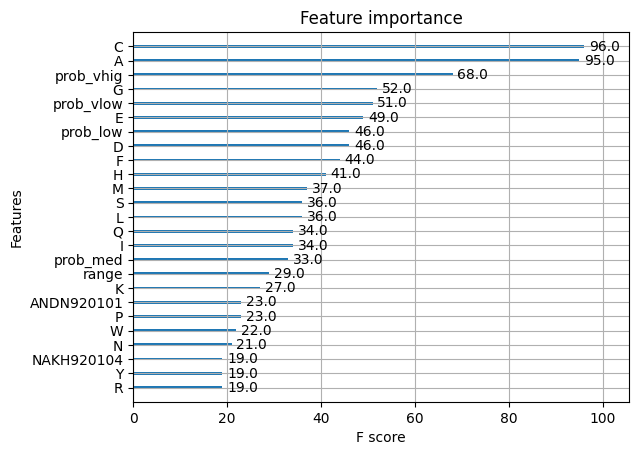

In [56]:
xgb.plot_importance(model, max_num_features = 25)

In [58]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_train)

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\core.py:122: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



In [84]:
X100 = shap.utils.sample(X_train, 2000)
explainer_xgb = shap.Explainer(model, X100)
shap_values_xgb = explainer_xgb(X_train)

100%|===================| 2322/2333 [00:53<00:00]        

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

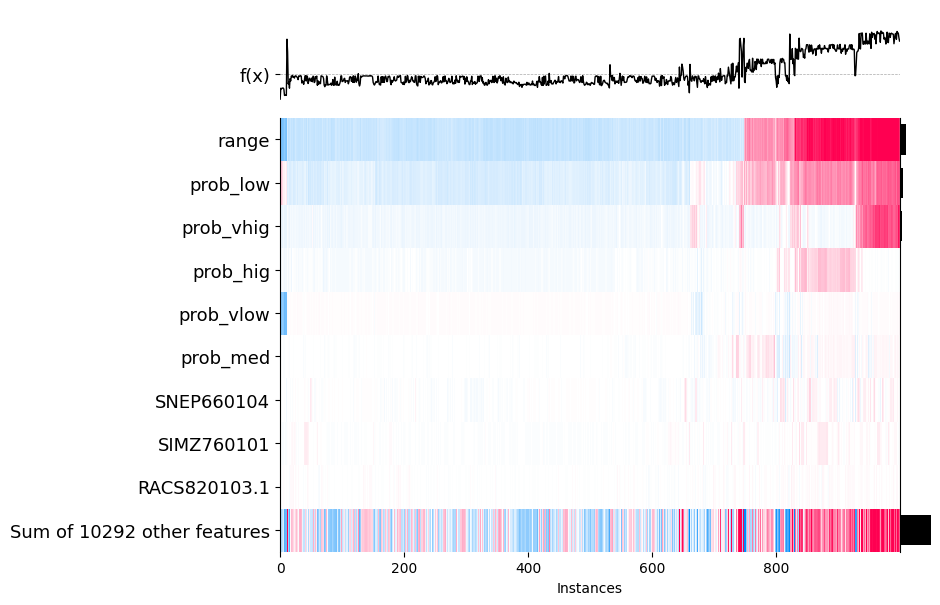

In [85]:
shap.plots.heatmap(shap_values_xgb[:1000])

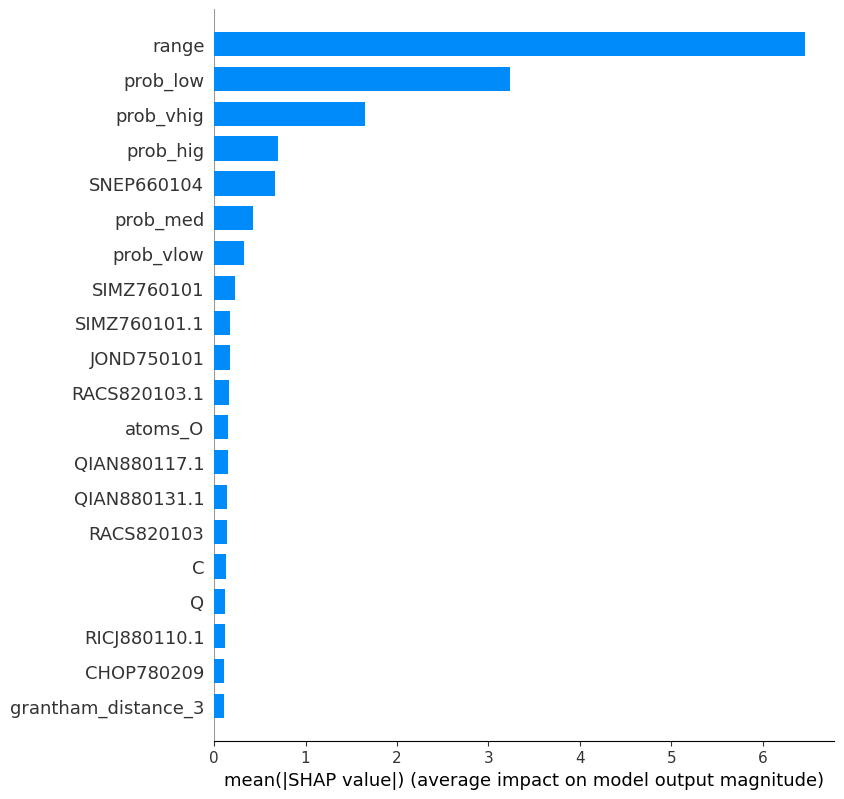

In [82]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [83]:
shap.plots.scatter(shap_values[:,"C"])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [78]:
shap.plots.scatter(shap_values_xgb)

Exception: The passed Explanation object has multiple columns, please pass a single feature column to shap.plots.dependence like: shap_values[:,column]

d:\anaconda\envs\Master_thesis\lib\site-packages\shap\plots\_beeswarm.py:653: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



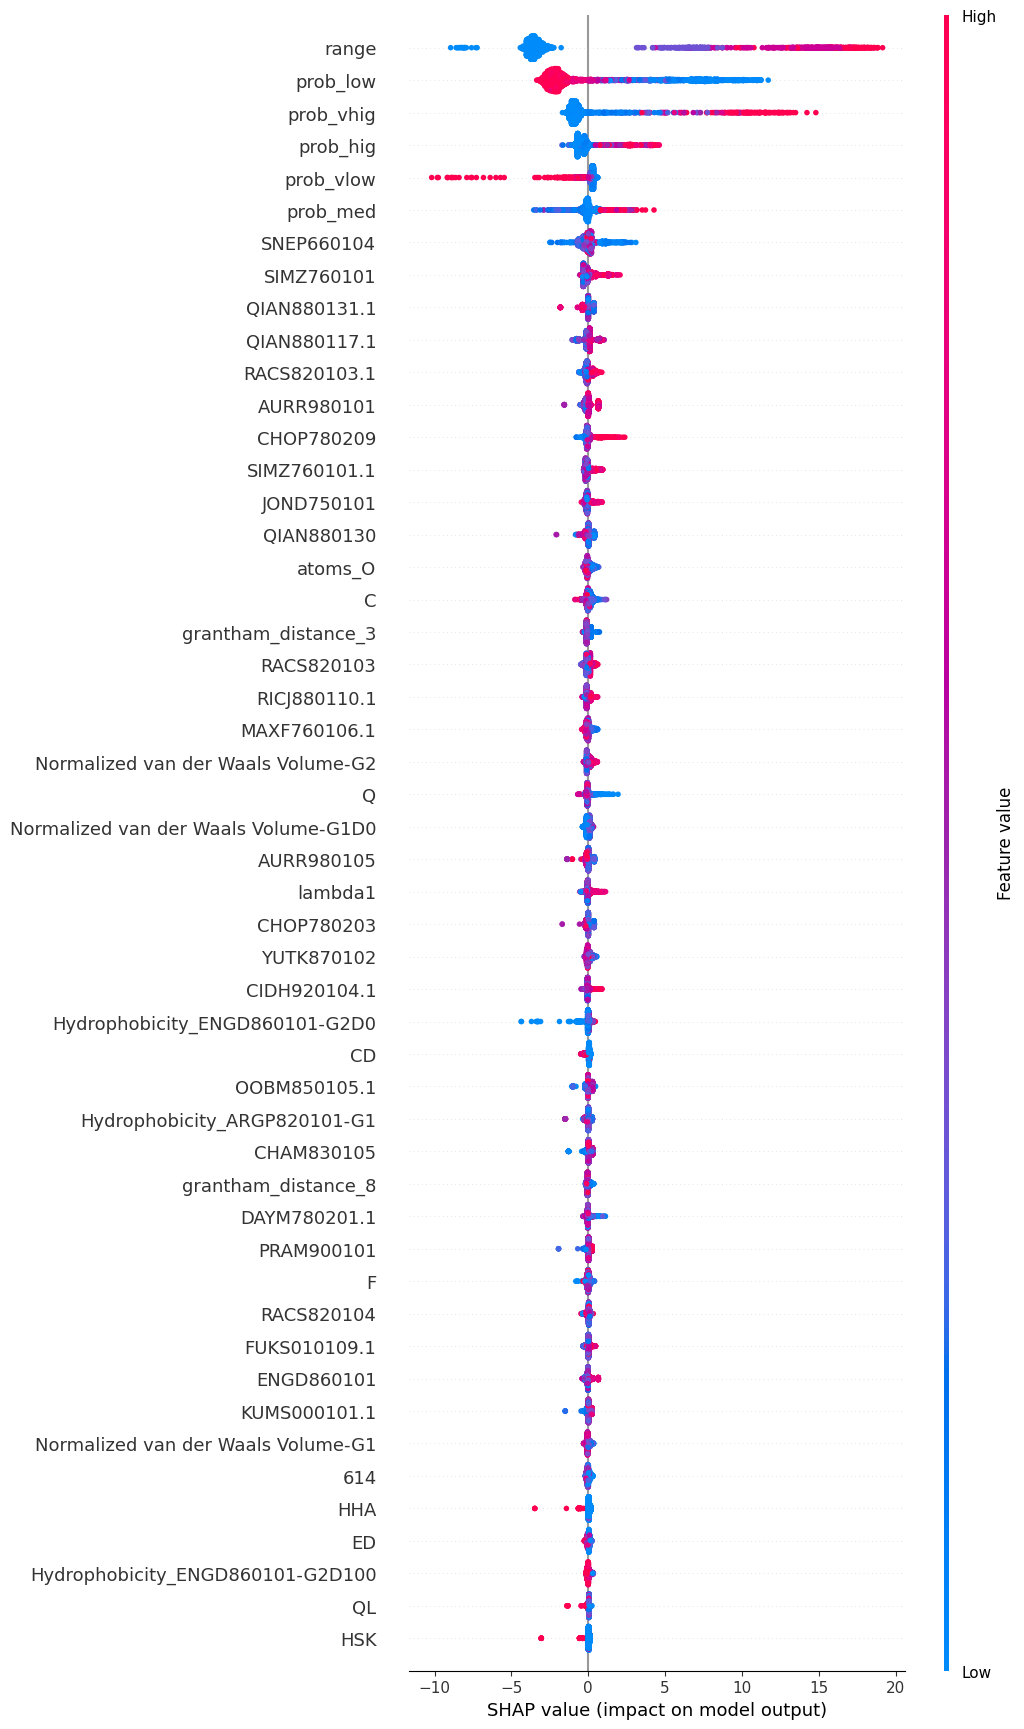

In [86]:
shap.summary_plot(shap_values_xgb, X_train, max_display = 50)

In [64]:
shap.plots.heatmap(shap_values,X_train)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [66]:
shap.plots.scatter(shap_values[:,"range"])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices